In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import matrixprofile as mp
from matplotlib.patches import Rectangle
from fbprophet import Prophet
from prophet.plot import plot_yearly
from sklearn.metrics import mean_squared_error
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sklearn.model_selection import TimeSeriesSplit
from numpy import sqrt
import datetime
from datetime import timedelta

/home/jonathan/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def df_origen(origen,destino):    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df1.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df2.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)           
    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df3.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    
    
    df1_Final['Fecha'] = df1_Final.index.date
    df1_Final['Año'] = df1_Final.index.year                                
    df1_Final['Mes'] = df1_Final.index.month                               
    df1_Final['ID_Dia'] = df1_Final.index.dayofweek
    df1_Final['Hora'] = df1_Final.index.hour
    df1_Final['WeekNo'] = df1_Final.index.isocalendar().week
    
    df2_Final['Fecha'] = df2_Final.index.date
    df2_Final['Año'] = df2_Final.index.year                                
    df2_Final['Mes'] = df2_Final.index.month                               
    df2_Final['ID_Dia'] = df2_Final.index.dayofweek
    df2_Final['Hora'] = df2_Final.index.hour
    df2_Final['WeekNo'] = df2_Final.index.isocalendar().week
    
    df3_Final['Fecha'] = df3_Final.index.date
    df3_Final['Año'] = df3_Final.index.year                                
    df3_Final['Mes'] = df3_Final.index.month                               
    df3_Final['ID_Dia'] = df3_Final.index.dayofweek
    df3_Final['Hora'] = df3_Final.index.hour
    df3_Final['WeekNo'] = df3_Final.index.isocalendar().week
    
    return df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst

In [3]:
origen = "2807905"
destino = "2807901"
df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst = df_origen(origen,destino)
df1_Final.head(5)
df2_Final.head(5)
df3_Final.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-08-01 00:00:00,342.675,2020-08-01,2020,8,5,0,31
2020-08-01 01:00:00,161.815,2020-08-01,2020,8,5,1,31
2020-08-01 02:00:00,69.203,2020-08-01,2020,8,5,2,31
2020-08-01 03:00:00,44.679,2020-08-01,2020,8,5,3,31
2020-08-01 04:00:00,27.632,2020-08-01,2020,8,5,4,31


In [4]:
#Creamos intervalos de datos por periodos
data1=df1_Final.loc['2020-03-16':'2020-04-15']
data2=df1_Final.loc['2020-04-16':'2020-05-15']
data3=df1_Final.loc['2020-05-02':'2020-05-31']
data4=df2_Final.loc['2020-06-01':'2020-06-30']
data5=df2_Final.loc['2020-07-01':'2020-07-31']
data6=df3_Final.loc['2020-08-01':'2020-08-31']
data3.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-05-02 00:00:00,6.944,2020-05-02,2020,5,5,0,18
2020-05-02 01:00:00,17.860,2020-05-02,2020,5,5,1,18
2020-05-02 02:00:00,11.972,2020-05-02,2020,5,5,2,18
2020-05-02 03:00:00,12.205,2020-05-02,2020,5,5,3,18
2020-05-02 04:00:00,5.986,2020-05-02,2020,5,5,4,18


# Periodo 1 - Desescalada y Nueva Normalidad (2 mayo 2020-31 Agosto 2020)

In [5]:
Periodo1 = pd.concat([data3,data4,data5,data6])
Periodo1 = Periodo1.drop(columns=['Fecha','Año','Mes','ID_Dia','Hora','WeekNo'])
Periodo1 = Periodo1.reset_index()
Periodo1 = Periodo1.rename(columns={'2807905-2807901':'y'})
Periodo1.tail()

,ds,y
2923,2020-08-31 19:00:00,509.100
2924,2020-08-31 20:00:00,293.615
2925,2020-08-31 21:00:00,256.641
2926,2020-08-31 22:00:00,172.866
2927,2020-08-31 23:00:00,140.111


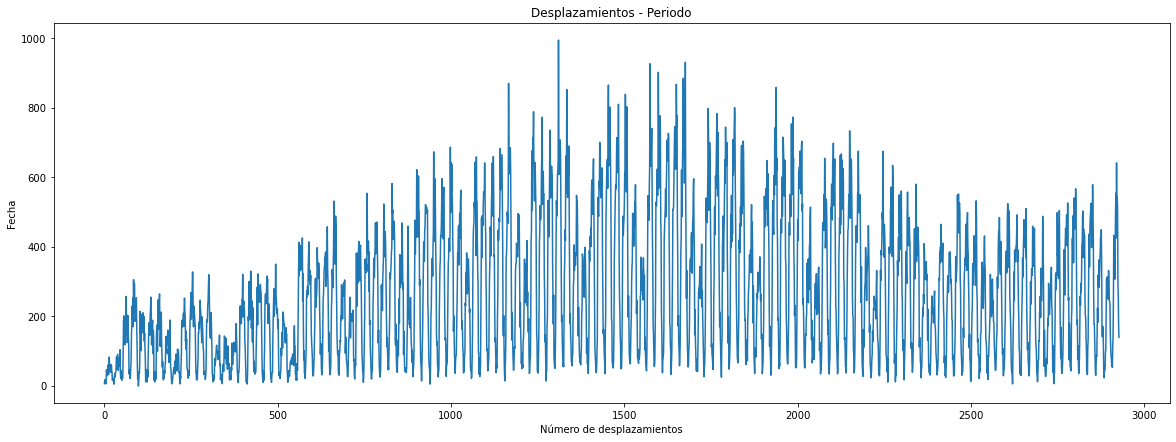

In [6]:
Periodo1['y'].plot(figsize=(20,7), legend=None, title='Desplazamientos - Periodo')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

In [7]:
def est_Lunes1AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 1)

def est_Lunes2AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 2)

def est_Lunes3AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 3)

def est_Lunes4AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 4)

def est_Lunes5AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 5)

def est_Lunes6AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 6)

def est_Lunes7AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 7)

def est_Lunes8AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 8)

def est_Lunes9AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 9)

def est_Lunes10AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 10)

def est_Lunes11AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 11)

def est_Lunes12PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 12)

def est_Lunes13PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 13)

def est_Lunes14PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 14)

def est_Lunes15PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 15)

def est_Lunes16PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 16)

def est_Lunes17PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 17)

def est_Lunes18PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 18)

def est_Lunes19PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 19)

def est_Lunes20PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 20)

def est_Lunes21PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 21)

def est_Lunes22PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 22)

def est_Lunes23PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 23)

def est_Lunes24AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 0)

Periodo1['Lunes1AM'] = Periodo1['ds'].apply(est_Lunes1AM)

Periodo1['Lunes2AM'] = Periodo1['ds'].apply(est_Lunes2AM)

Periodo1['Lunes3AM'] = Periodo1['ds'].apply(est_Lunes3AM)

Periodo1['Lunes4AM'] = Periodo1['ds'].apply(est_Lunes4AM)

Periodo1['Lunes5AM'] = Periodo1['ds'].apply(est_Lunes5AM)

Periodo1['Lunes6AM'] = Periodo1['ds'].apply(est_Lunes6AM)

Periodo1['Lunes7AM'] = Periodo1['ds'].apply(est_Lunes7AM)

Periodo1['Lunes8AM'] = Periodo1['ds'].apply(est_Lunes8AM)

Periodo1['Lunes9AM'] = Periodo1['ds'].apply(est_Lunes9AM)

Periodo1['Lunes10AM'] = Periodo1['ds'].apply(est_Lunes10AM)

Periodo1['Lunes11AM'] = Periodo1['ds'].apply(est_Lunes11AM)

Periodo1['Lunes12PM'] = Periodo1['ds'].apply(est_Lunes12PM)

Periodo1['Lunes13PM'] = Periodo1['ds'].apply(est_Lunes13PM)

Periodo1['Lunes14PM'] = Periodo1['ds'].apply(est_Lunes14PM)

Periodo1['Lunes15PM'] = Periodo1['ds'].apply(est_Lunes15PM)

Periodo1['Lunes16PM'] = Periodo1['ds'].apply(est_Lunes16PM)

Periodo1['Lunes17PM'] = Periodo1['ds'].apply(est_Lunes17PM)

Periodo1['Lunes18PM'] = Periodo1['ds'].apply(est_Lunes18PM)

Periodo1['Lunes19PM'] = Periodo1['ds'].apply(est_Lunes19PM)

Periodo1['Lunes20PM'] = Periodo1['ds'].apply(est_Lunes20PM)

Periodo1['Lunes21PM'] = Periodo1['ds'].apply(est_Lunes21PM)

Periodo1['Lunes22PM'] = Periodo1['ds'].apply(est_Lunes22PM)

Periodo1['Lunes23PM'] = Periodo1['ds'].apply(est_Lunes23PM)

Periodo1['Lunes24AM'] = Periodo1['ds'].apply(est_Lunes24AM)


# IMPLEMENTACIÓN DE MODELO PROPHET
## Separamos el conjunto de datos de entrenamiento y prueba

In [8]:
Periodo1 = Periodo1.set_index('ds')

In [9]:
#Periodo 1 Desescalada y nueva Normalidad
train_end = datetime.datetime(2020,8,30,23,0,0)
test_end = datetime.datetime(2020,8,31,23,0,0)

train_data = Periodo1[:train_end]
test_data = Periodo1[train_end + timedelta(hours=1):test_end]

In [10]:
train_data = train_data.reset_index()
test_data = test_data.reset_index()

In [11]:
test_data

,ds,y,Lunes1AM,Lunes2AM,Lunes3AM,Lunes4AM,Lunes5AM,Lunes6AM,Lunes7AM,Lunes8AM,...,Lunes15PM,Lunes16PM,Lunes17PM,Lunes18PM,Lunes19PM,Lunes20PM,Lunes21PM,Lunes22PM,Lunes23PM,Lunes24AM
0,2020-08-31 00:00:00,86.844,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2020-08-31 01:00:00,82.143,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2020-08-31 02:00:00,58.444,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2020-08-31 03:00:00,73.620,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2020-08-31 04:00:00,53.500,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2020-08-31 05:00:00,112.960,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2020-08-31 06:00:00,143.088,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7,2020-08-31 07:00:00,252.659,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8,2020-08-31 08:00:00,433.064,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9,2020-08-31 09:00:00,371.916,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Ajustamos el periodo de Fourier-Horas con el periodo de datos entrenamiento

In [12]:
start = train_data.iloc[0]['ds']
end = train_data.iloc[-1]['ds'] 
N_Dias = pd.date_range(start, end, freq='D')
print(len(N_Dias))
print(N_Dias)

121
DatetimeIndex(['2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05',
               '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09',
               '2020-05-10', '2020-05-11',
               ...
               '2020-08-21', '2020-08-22', '2020-08-23', '2020-08-24',
               '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
               '2020-08-29', '2020-08-30'],
              dtype='datetime64[ns]', length=121, freq='D')


In [13]:
print(len(train_data)/24)

121.0


## Aplicamos Rolling Forecasting para evaluación del modelo

In [14]:
# Se crea una función de predicción continua
def rolling_forecast():       
    predictions_rolling = pd.DataFrame({})
    history = train_data.copy()   # El problema es en history   
    
    for t in range(len(test_data)):        
        m = Prophet()          
        m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
#         m.add_seasonality(name='Lunes24AM_season', period=127, fourier_order=7, condition_name='Lunes24AM')
#         m.add_seasonality(name='Lunes1AM_season', period=127, fourier_order=7, condition_name='Lunes1AM')
#         m.add_seasonality(name='Lunes2AM_season', period=127, fourier_order=7, condition_name='Lunes2AM')
#         m.add_seasonality(name='Lunes3AM_season', period=127, fourier_order=7, condition_name='Lunes3AM')
#         m.add_seasonality(name='Lunes4AM_season', period=127, fourier_order=7, condition_name='Lunes4AM')
#         m.add_seasonality(name='Lunes5AM_season', period=127, fourier_order=7, condition_name='Lunes5AM')
#         m.add_seasonality(name='Lunes6AM_season', period=127, fourier_order=7, condition_name='Lunes6AM')
#         m.add_seasonality(name='Lunes7AM_season', period=127, fourier_order=7, condition_name='Lunes7AM')
        m.add_seasonality(name='Lunes8AM_season', period=121, fourier_order=5, condition_name='Lunes8AM')
#         m.add_seasonality(name='Lunes9AM_season', period=127, fourier_order=7, condition_name='Lunes9AM')
#         m.add_seasonality(name='Lunes10AM_season', period=127, fourier_order=7, condition_name='Lunes10AM')
#         m.add_seasonality(name='Lunes11AM_season', period=127, fourier_order=7, condition_name='Lunes11AM')
#         m.add_seasonality(name='Lunes12PM_season', period=127, fourier_order=7, condition_name='Lunes12PM')
#         m.add_seasonality(name='Lunes13PM_season', period=127, fourier_order=7, condition_name='Lunes13PM')
        m.add_seasonality(name='Lunes14PM_season', period=121, fourier_order=5, condition_name='Lunes14PM')        
#         m.add_seasonality(name='Lunes15PM_season', period=127, fourier_order=7, condition_name='Lunes15PM')        
        m.add_seasonality(name='Lunes16PM_season', period=121, fourier_order=5, condition_name='Lunes16PM')
#         m.add_seasonality(name='Lunes17PM_season', period=127, fourier_order=7, condition_name='Lunes17PM')
#         m.add_seasonality(name='Lunes18PM_season', period=127, fourier_order=7, condition_name='Lunes18PM')
#         m.add_seasonality(name='Lunes19PM_season', period=127, fourier_order=7, condition_name='Lunes19PM')
#         m.add_seasonality(name='Lunes20PM_season', period=127, fourier_order=7, condition_name='Lunes20PM')
#         m.add_seasonality(name='Lunes21PM_season', period=127, fourier_order=7, condition_name='Lunes21PM')
#         m.add_seasonality(name='Lunes22PM_season', period=127, fourier_order=7, condition_name='Lunes22PM')
#         m.add_seasonality(name='Lunes23PM_season', period=127, fourier_order=7, condition_name='Lunes23PM')
        
    
        m.fit(history);
        
        #future es el Dataframe con todas las fEchas de entrenamiento y va agregando fechas futuras en cada ciclo        
        future = m.make_future_dataframe(periods=1, freq='H')           
        
        
        future['Lunes1AM'] = future['ds'].apply(est_Lunes1AM)        
        future['Lunes2AM'] = future['ds'].apply(est_Lunes2AM)        
        future['Lunes3AM'] = future['ds'].apply(est_Lunes3AM)        
        future['Lunes4AM'] = future['ds'].apply(est_Lunes4AM)        
        future['Lunes5AM'] = future['ds'].apply(est_Lunes5AM)        
        future['Lunes6AM'] = future['ds'].apply(est_Lunes6AM)        
        future['Lunes7AM'] = future['ds'].apply(est_Lunes7AM)       
        future['Lunes8AM'] = future['ds'].apply(est_Lunes8AM)        
        future['Lunes9AM'] = future['ds'].apply(est_Lunes9AM)        
        future['Lunes10AM'] = future['ds'].apply(est_Lunes10AM)        
        future['Lunes11AM'] = future['ds'].apply(est_Lunes11AM)        
        future['Lunes12PM'] = future['ds'].apply(est_Lunes12PM)        
        future['Lunes13PM'] = future['ds'].apply(est_Lunes13PM)        
        future['Lunes14PM'] = future['ds'].apply(est_Lunes14PM)        
        future['Lunes15PM'] = future['ds'].apply(est_Lunes15PM)        
        future['Lunes16PM'] = future['ds'].apply(est_Lunes16PM)        
        future['Lunes17PM'] = future['ds'].apply(est_Lunes17PM)        
        future['Lunes18PM'] = future['ds'].apply(est_Lunes18PM)        
        future['Lunes19PM'] = future['ds'].apply(est_Lunes19PM)        
        future['Lunes20PM'] = future['ds'].apply(est_Lunes20PM)        
        future['Lunes21PM'] = future['ds'].apply(est_Lunes21PM)        
        future['Lunes22PM'] = future['ds'].apply(est_Lunes22PM)        
        future['Lunes23PM'] = future['ds'].apply(est_Lunes23PM)        
        future['Lunes24AM'] = future['ds'].apply(est_Lunes24AM)
        
        
        
        #forecast contiene todos los datos de entrenamiento, además va agregando 1 a 1 las predicciones        
        forecast = m.predict(future)         
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]                
        
        # La variable yhat contiene la predicción en cada ciclo 
        yhat = output[['yhat']][len(history):].values[0][0]  
        yhat2 = output[['ds','yhat']][len(history):]         
        predictions_rolling = predictions_rolling.append(yhat2)       
        
        #obs crea un nuevo datafRame en cada ciclo con la fecha a predecir y el valor real
        data = {'ds': [test_data[['ds']].iloc[t]]}
        obs = pd.DataFrame(test_data[['ds','y','Lunes1AM','Lunes2AM','Lunes3AM','Lunes4AM','Lunes5AM','Lunes6AM','Lunes7AM','Lunes8AM','Lunes9AM','Lunes10AM','Lunes11AM','Lunes12PM','Lunes13PM','Lunes14PM','Lunes15PM','Lunes16PM','Lunes17PM','Lunes18PM','Lunes19PM','Lunes20PM','Lunes21PM','Lunes22PM','Lunes23PM','Lunes24AM']].iloc[t]) #t inicia en 0 hasta la longitud de test_x      
        
        #history concatena los datos de entrenamiento y los datos de prueba (test)
        history = pd.concat([history, obs.transpose()],axis=0) #Hace que el dataframe se actualice con fEchas futuras       
        
        #print('predicted=%f, expected=%f' % (yhat, obs.transpose()['y']))
    fig = m.plot_components(forecast)
        
    return fig, predictions_rolling

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -117.378
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5548.73    0.00584433       112.492           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5551.81   1.30866e-05       54.6701      0.6567      0.6567      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       5552.65   0.000238586       123.777   3.117e-06       0.001      332  LS failed, Hessian reset 
     299       5553.23   0.000105929       71.6491           1           1      416   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5553.58    0.00332388        87.726      0.4197           1      540   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     414       5553.74   0.000264484    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -126.749
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5550.39    0.00173474       75.7523      0.3847           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101        5550.4   0.000119772       72.8974   1.737e-06       0.001      158  LS failed, Hessian reset 
     147       5553.08   0.000292343       161.458   1.241e-06       0.001      247  LS failed, Hessian reset 
     199       5554.07    0.00148199       87.3467           1           1      309   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     203       5554.15   0.000204359       113.502    1.34e-06       0.001      352  LS failed, Hessian reset 
     265       5554.85   0.000202298       69.6499   8.419e-07       0.001      480  LS failed, Hessian reset 
     299       5555.33     0.0011837        45.901           1   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -128.375
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5551.92     0.0126155       238.092      0.1856           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     140       5555.06   0.000284518       162.799   1.172e-06       0.001      225  LS failed, Hessian reset 
     169       5556.11   0.000201359        124.75    2.17e-06       0.001      299  LS failed, Hessian reset 
     199       5556.22   5.78585e-05       66.9027      0.4049           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       5557.05   0.000141729        77.664    9.69e-07       0.001      423  LS failed, Hessian reset 
     299       5557.95    0.00358546       53.8033           1           1      517   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -136.861
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86       5554.88   0.000665791       94.3614   7.144e-06       0.001      141  LS failed, Hessian reset 
      99       5555.82    0.00351801       268.941      0.5149           1      155   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       5557.88   0.000980282       151.866   1.288e-05       0.001      245  LS failed, Hessian reset 
     199       5558.82   0.000427084       82.3959   9.504e-06       0.001      366  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     254       5559.55   0.000201889       119.869   1.454e-06       0.001      479  LS failed, Hessian reset 
     299       5560.12    0.00156679       60.0668      0.2521           1      537   
    Iter      log prob        ||dx||      ||grad||       alpha   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -131.378
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5557.16    0.00376932       182.091           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5560.36   0.000184085       82.3407      0.3795      0.3795      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     247       5561.24   0.000258651       127.633   3.102e-06       0.001      354  LS failed, Hessian reset 
     299       5561.52   0.000105935       67.0749           1           1      419   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       5561.94   0.000216181        128.09   2.029e-06       0.001      488  LS failed, Hessian reset 
     367       5562.18   2.03735e-05       71.0821   3.563e-07       0.001      597  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -138.711
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5558.57     0.0247578       124.047           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5563.64    0.00298782        106.55      0.4558           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5564.82   8.62741e-05       66.5609           1           1      374   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5565.01   3.57627e-05       54.5231           1           1      511   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     434       5565.07   0.000269105       85.1233   3.724e-06       0.001      611  LS failed, Hessian reset 
     461       5565.08   1.02638e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -118.222
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5562.61     0.0091911       120.809           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       5562.63   0.000272086       125.711   3.282e-06       0.001      171  LS failed, Hessian reset 
     199        5565.4    0.00529596       169.777           1           1      300   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       5566.09   0.000560252       82.3271   5.703e-06       0.001      364  LS failed, Hessian reset 
     299       5566.85    0.00398566       84.5063      0.4281           1      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314       5566.96   0.000132065       93.4017   1.017e-06       0.001      542  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -109.172
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5563.81    0.00102489       82.5633           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152       5567.01   0.000293701       125.343   3.941e-06       0.001      222  LS failed, Hessian reset 
     181       5567.22   0.000181326       50.4206   3.725e-06       0.001      292  LS failed, Hessian reset 
     199       5567.28   0.000125324       57.3663      0.6376      0.6376      315   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     248       5568.83   0.000355337       101.953   8.369e-07       0.001      419  LS failed, Hessian reset 
     299       5569.37   0.000207367       52.1566      0.3795           1      481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -83.7407
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5567.29    0.00674795       250.704           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     189       5570.67   0.000346899       182.235   2.152e-06       0.001      275  LS failed, Hessian reset 
     199       5571.06    0.00173762        92.244      0.3825       0.961      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       5571.49   0.000327437       66.3979   5.549e-06       0.001      380  LS failed, Hessian reset 
     279        5571.6   0.000151346         101.2   2.028e-06       0.001      468  LS failed, Hessian reset 
     299       5571.63   5.57138e-05       52.4868           1           1      493   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -67.5029
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5568.08   0.000914941       54.9062      0.7124      0.7124      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       5569.55   0.000352916       175.072    1.03e-06       0.001      192  LS failed, Hessian reset 
     199       5571.55     0.0014321       83.0131      0.2037           1      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       5571.76   0.000143724       92.6919   1.463e-06       0.001      379  LS failed, Hessian reset 
     299       5572.67    0.00052467       96.9118       2.626      0.2626      487   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       5572.76   3.19536e-05       39.9531   6.392e-07       0.001      560  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -69.446
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5569.67      0.001801       146.168           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5573.52    0.00318277       100.394      0.2639           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     259       5574.61   0.000211809        114.34   2.841e-06       0.001      356  LS failed, Hessian reset 
     299       5574.71   7.66536e-05       60.7719           1           1      415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       5574.71   0.000125432       66.3151   1.924e-06       0.001      460  LS failed, Hessian reset 
     388       5574.87   7.79996e-05       67.9071   1.059e-06       0.001      615  LS failed, Hessian reset

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -68.3915
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5572.57    0.00348149       161.002     0.06896           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5575.82   0.000956144       61.6111           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220       5576.16   0.000135676       89.4789   1.298e-06       0.001      308  LS failed, Hessian reset 
     299       5577.06   0.000635679       64.9011           1           1      394   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     363       5577.13   9.67027e-07       52.8944   1.709e-08       0.001      526  LS failed, Hessian reset 
     367       5577.13   2.00507e-07       53.3694     0.05733           1      534   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -75.5073
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5574.18     0.0169462       216.904          10           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5577.51    0.00284671       89.8269      0.7042      0.7042      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5579.25   0.000373055       85.1879      0.2944           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5579.47   5.05147e-06       39.6389      0.3012           1      505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     421       5579.47   1.49171e-07       40.9483     0.05671           1      538   
Optimization terminated normally: 
  Convergence detected: relat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -68.0786
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5576.25    0.00227517       78.0164           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5580.1    0.00221598       69.4014      0.2365           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     285       5581.44   0.000255708       134.657   3.596e-06       0.001      389  LS failed, Hessian reset 
     299        5581.6   1.87232e-05       40.8733      0.1963      0.1963      405   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     320       5581.67   0.000384396       64.7117   5.682e-06       0.001      478  LS failed, Hessian reset 
     363       5581.68   5.32998e-05       69.0921   7.283e-07       0.001      577  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -69.0218
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5579.06   0.000683871       91.3563      0.5755      0.5755      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       5580.58   0.000146948       89.9877   1.751e-06       0.001      210  LS failed, Hessian reset 
     199       5582.12    0.00201545       112.627      0.3922           1      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     234       5583.68   0.000160896       96.0832   1.321e-06       0.001      376  LS failed, Hessian reset 
     299       5584.06   0.000178959       45.3852           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314       5584.09   0.000147063       79.1609    2.07e-06       0.001      531  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -74.5092
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5579.91    0.00266544       86.1259      0.6813           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     145       5581.61   0.000135767       83.0902   1.436e-06       0.001      217  LS failed, Hessian reset 
     199       5583.28   0.000209875       69.2943      0.2477           1      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     290       5584.69   0.000778577       207.715   1.179e-05       0.001      434  LS failed, Hessian reset 
     299       5584.79    0.00133909       65.9107           1           1      443   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326       5584.98   0.000189649       50.7153   2.788e-06       0.001      533  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -67.5725
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5582.31    0.00358028       239.772      0.6592      0.6592      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     181       5585.66   0.000314539       64.3936   4.559e-06       0.001      257  LS failed, Hessian reset 
     199       5585.85    0.00143366       64.2769           1           1      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     293        5587.1   0.000115242       74.7576   1.478e-06       0.001      485  LS failed, Hessian reset 
     299       5587.12    0.00117203       132.829           1           1      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     380       5587.45   0.000446797       78.8372   6.949e-06       0.001      631  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -88.3354
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5581.39    0.00105091       83.8575      0.5152      0.5152      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5584.87     0.0104099       156.172           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       5585.49   0.000185044       83.2279   9.133e-07       0.001      311  LS failed, Hessian reset 
     273       5586.52   0.000131364       67.6785   9.472e-07       0.001      433  LS failed, Hessian reset 
     295       5586.59   1.85077e-05       51.8944   3.925e-07       0.001      498  LS failed, Hessian reset 
     299       5586.59    1.0546e-05       41.4694           1           1      503   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -68.8987
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5584.42     0.0109069       267.432           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5587.65   0.000304995       154.017      0.4287      0.4287      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     279       5588.22   0.000139815       87.7292    1.38e-06       0.001      388  LS failed, Hessian reset 
     299       5588.36   6.15756e-05       66.6732      0.6216      0.6216      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     357       5588.54   0.000417081       150.337    4.52e-06       0.001      529  LS failed, Hessian reset 
     399       5588.65   2.50539e-05       43.7574      0.9001      0.9001      577   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -73.2176
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5586.04    0.00457413       141.463      0.2896           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     119       5587.42   0.000196497       109.389   2.929e-06       0.001      192  LS failed, Hessian reset 
     199       5589.31   0.000186612       56.6841      0.8212      0.8212      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     284       5589.97   0.000116827       74.3171   1.544e-06       0.001      426  LS failed, Hessian reset 
     299       5590.11   0.000518473       77.7977           1           1      444   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5590.48   4.41376e-05       60.9464     0.09171           1      566   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -70.136
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5588.73    0.00844896       121.615      0.1423           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     119       5589.71   0.000168627       106.638   1.343e-06       0.001      183  LS failed, Hessian reset 
     199       5591.64    0.00068545       75.4311       1.126      0.2393      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     250       5592.69   0.000119127       89.4087   1.542e-06       0.001      415  LS failed, Hessian reset 
     299       5592.95   3.79646e-05        84.963      0.2234           1      484   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     348       5593.06   0.000175125       97.5229   2.174e-06       0.001      594  LS failed, Hessian reset

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -77.6525
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5589.35    0.00393816        208.42      0.3683           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     150       5591.38   0.000257763       85.7174   8.411e-07       0.001      254  LS failed, Hessian reset 
     187       5591.95   0.000317549       84.8433   4.995e-06       0.001      334  LS failed, Hessian reset 
     199       5591.97   1.70425e-05       38.9676      0.4134      0.4134      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5593.76   0.000678038       122.685      0.5798      0.5798      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     305       5593.79   0.000135038       78.6719   2.535e-06       0.001      523  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -83.5556
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5590.14    0.00146854       183.544       0.991       0.991      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     196       5593.94   0.000125571       75.2557   1.324e-06       0.001      287  LS failed, Hessian reset 
     199       5593.95   6.17224e-05       39.7796        2.73      0.5785      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     265        5595.1   0.000244325       93.3152   8.963e-07       0.001      423  LS failed, Hessian reset 
     299       5595.61   0.000250742       108.638      0.5634      0.5634      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     398       5595.88   4.39773e-06       67.9482   8.334e-08       0.001      644  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -101.9
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5592.41    0.00129482       91.1402      0.8456      0.8456      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     191       5596.04   0.000144694       71.1169   9.424e-07       0.001      285  LS failed, Hessian reset 
     199       5596.42    0.00108844       208.946           1           1      295   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5597.31   0.000463631       120.756           1           1      428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5597.93   2.92068e-05       41.7536      0.5994      0.5994      551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     439       5598.01   4.35618e-05      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_8194/3396536358.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_com

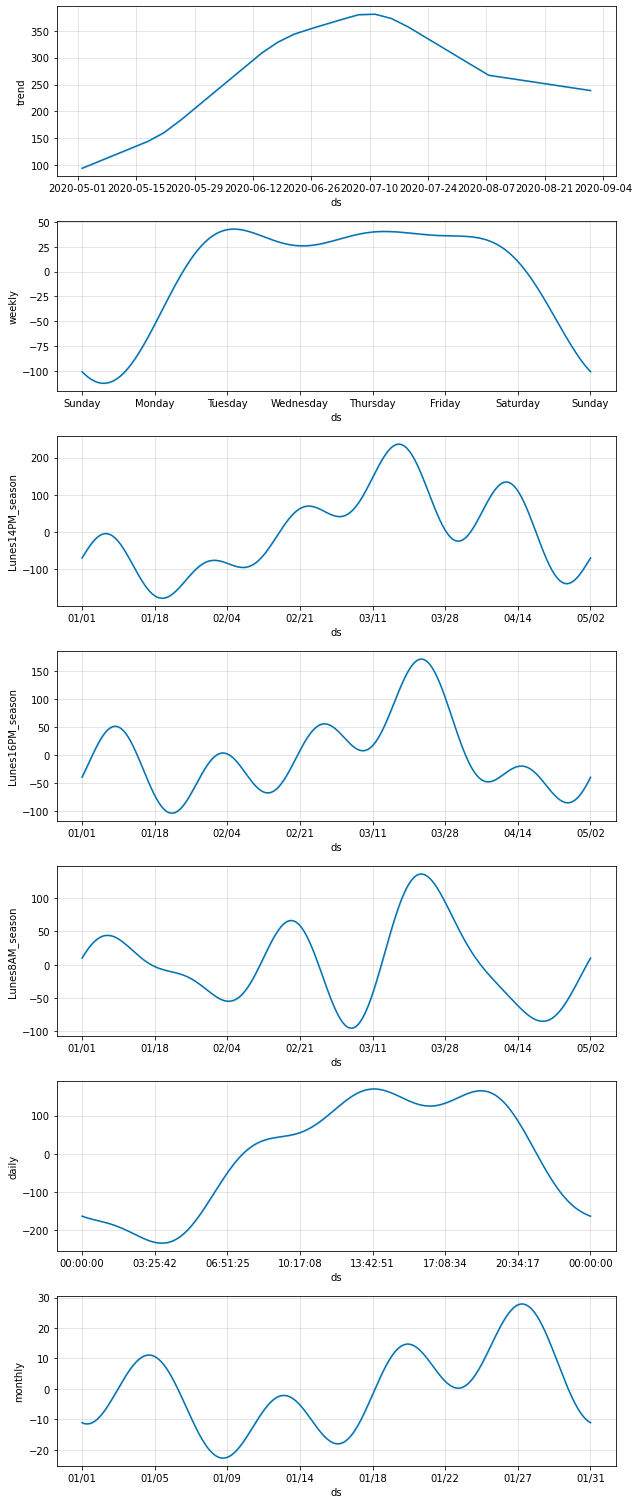

In [15]:
fig, predictions_rolling = rolling_forecast()

In [16]:
predictions_rolling = predictions_rolling.set_index('ds')
test_data = test_data.set_index('ds')

In [17]:
residuals_rolling = test_data['y'] - predictions_rolling['yhat']
residuals_rolling = residuals_rolling.to_frame(name='residual_rolling')
residuals_rolling.head()

,residual_rolling
ds,
2020-08-31 00:00:00,44.946896
2020-08-31 01:00:00,49.930045
2020-08-31 02:00:00,36.966584
2020-08-31 03:00:00,74.101744
2020-08-31 04:00:00,58.566985


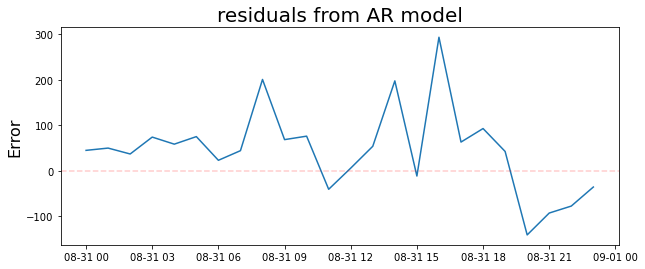

In [18]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('residuals from AR model', fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Desplazamientos')

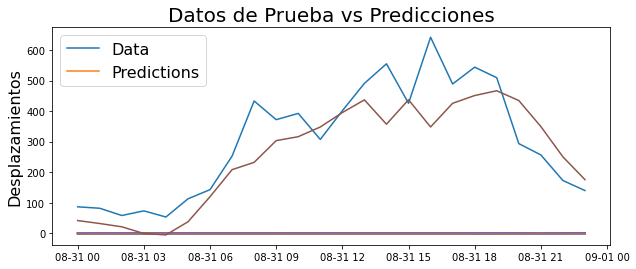

In [19]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions_rolling)

plt.legend(('Data','Predictions'),fontsize=16)

plt.title('Datos de Prueba vs Predicciones', fontsize=20)
plt.ylabel('Desplazamientos',fontsize=16)

# Cálculamos MAPE y RMSE
### RMSE se calculan de 2 formas distintas

# MAPE

In [20]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling['residual_rolling']/test_data['y'])),4))

Mean Absolute Percent Error: 0.3637


# RMSE

In [21]:
print('Root Mean Squared Error:',np.sqrt(np.mean(residuals_rolling**2)))
RMSE = sqrt(mean_squared_error(test_data.y, predictions_rolling.yhat))
RMSE

Root Mean Squared Error: residual_rolling    102.845458
dtype: float64


/home/jonathan/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


102.8454581580968

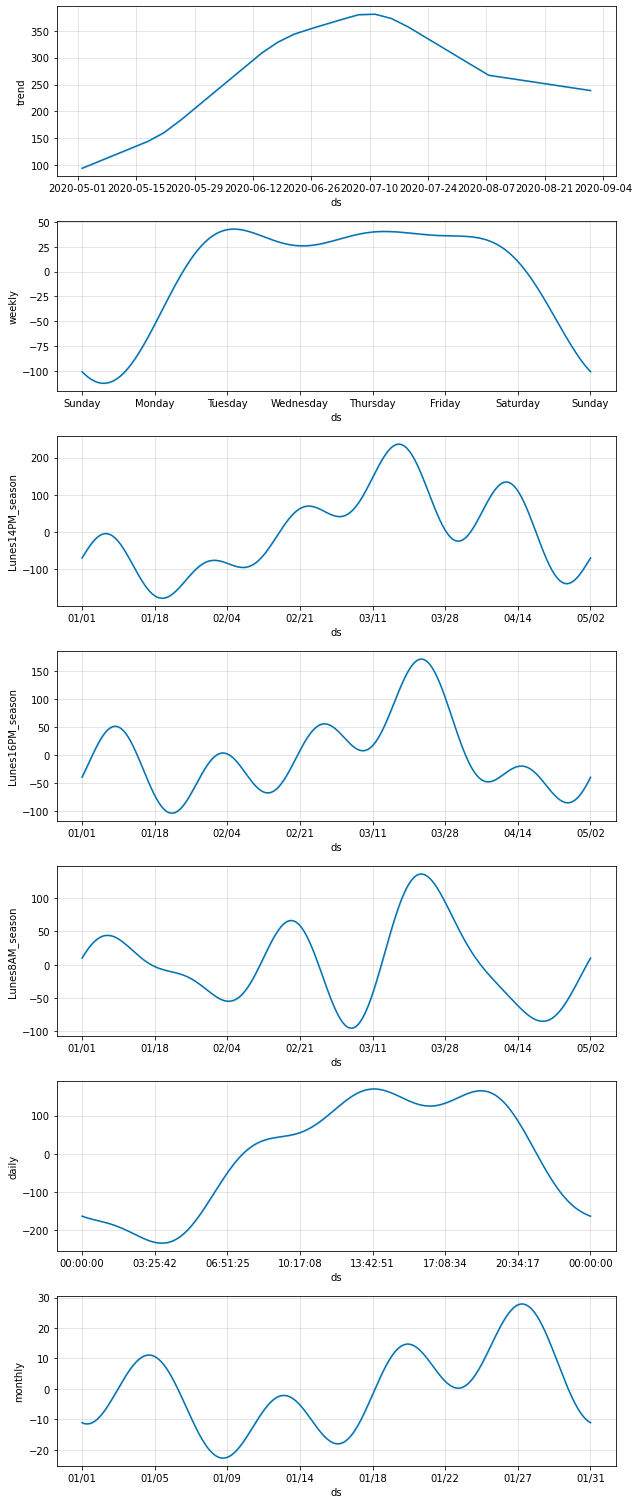

In [22]:
fig

# Nota: Creo que se puede mejorar la predicción si se ajusta el patrón tal cual como se ve en la linea de tiempo (123) y se entrena periodos concretos como desescalada y nueva normalidad.
# Con el in de avanzar propongo que muestre los resultados que has obtenido hasta ahora y lo siguiente es tratar de hacer una simulación implementando un regresor. 